## Test Boundary Element Method
Test is performed on a model problem with just two coils with unitary current density

In [1]:
from firedrake import *
from firedrake.pyplot import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = Mesh("../meshes/model_problem/model1.msh", dim = 2, distribution_parameters={"partition": False}, reorder = True)
m.init()

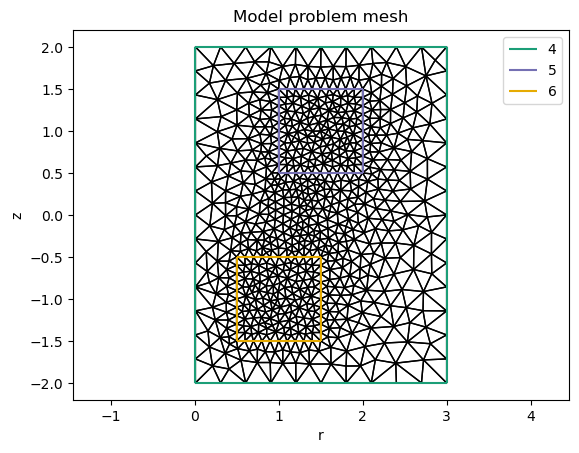

In [3]:
fig, ax = plt.subplots()
triplot(m, axes=ax)
plt.title(r"Model problem mesh")
plt.xlabel("r")
plt.ylabel("z")
plt.axis('equal')
plt.legend()
plt.show()

In [4]:
# Set up problem:
def model_problem(m, j1=1, j2=1):
    '''
        Define model equilibrium problem depending on the mesh.
        @param m: mesh
        @param j1,j2: coils current densities (unitary by default)
    '''
    V = FunctionSpace(m, "P", 1)
    u = TrialFunction(V)
    v = TestFunction(V)
    x,_ = SpatialCoordinate(m)
    mu0 = 4e-7 * pi  # Permeability of free space (in IS units)
    a = ( 1 / (mu0 * x) * dot(grad(u), grad(v)) ) * dx(domain=m)

    # Source term with coils currents
    L = j1 * v * dx(2,domain=m) + j2 * v * dx(3,domain=m)
    return V,a,L

#### Solve using homogeneous Dirichlet:

In [5]:
# Domain 3x4
V,a,L = model_problem(m)
bcs = [DirichletBC(V,0.0,4)]
psi = Function(V)
solve(a==L,psi,bcs=bcs)

# Display H1 norm:
H1_norm = norm(psi, 'H1')
print(f"H1 norm with 3x4 domain: ", H1_norm)

# Print maximum psi:
psi_max = np.max(psi.dat.data_ro[:])
print(f"Maximum psi", psi_max)

# Print integral over coils surfaces:
I = assemble(psi*dx(2)) + assemble(psi*dx(3))
print(f"Integral over coils", I)

H1 norm with 3x4 domain:  1.060759389835207e-06
Maximum psi 4.2564118456606624e-07
Integral over coils 5.198610667253504e-07


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


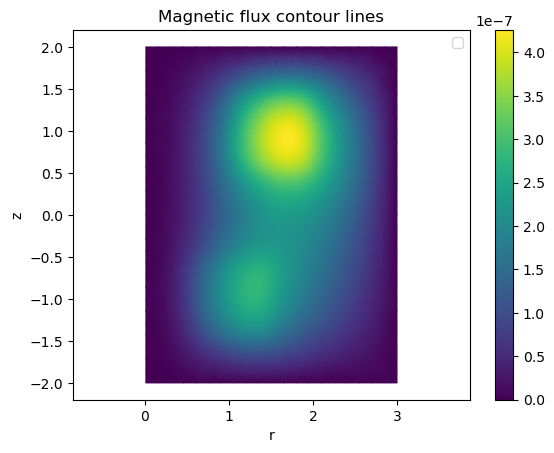

In [6]:
# Plot solution:
fig, ax = plt.subplots()
fig.colorbar(tripcolor(psi, axes=ax))
plt.title(r"Magnetic flux contour lines")
plt.xlabel("r")
plt.ylabel("z")
plt.axis('equal')
plt.legend()
plt.show()

#### Increase progressively the boundary size
Solve the problem by increasing progressively the boundary size and compute the H1 norm error normalized by the initial H1 norm computed on a boundary 3 meters x 4 meters.

In [7]:
m2 = Mesh("../meshes/model_problem/model_big.msh", dim = 2, distribution_parameters={"partition": False}, reorder = True)
m2.init()

V,a,L = model_problem(m2)
bcs = [DirichletBC(V,0.0,4)]
psi = Function(V)
solve(a==L,psi,bcs=bcs)

# Compute the error in terms :
new_norm = norm(psi,'H1')
err_norm = np.abs(1 - new_norm / H1_norm)
print(f"Error: ", err_norm)
#H1_norm = new_norm

# Print maximum psi:
psi_max_new = np.max(psi.dat.data_ro[:])
err_psi_max = np.abs(1 - psi_max_new / psi_max)
print(f"Maximum psi", err_psi_max)
#psi_max = psi_max_new

# Print integral over coils surfaces:
I_new = assemble(psi*dx(2)) + assemble(psi*dx(3))
err_I = np.abs(1 - I_new/I)
print(f"Integral over coils", err_I)
#I = I_new

Error:  1.1532493309478693
Maximum psi 0.33650358606074326
Integral over coils 0.3240033867018479


In [8]:
H1_norm = new_norm
psi_max = psi_max_new
I = I_new

##### Store here the values of the error for different domain sizes:

    |----------------------------------------------------------------------------|
    |    Width    |    Height    |    H1 norm   |    Max. psi    |   coils int.  |
    |----------------------------------------------------------------------------|
    |      6      |      8       |    0.3776    |    0.29275     |    0.28644    |
    |----------------------------------------------------------------------------|
    |      9      |      12      |    0.1193    |    0.02447     |    0.02106    |
    |----------------------------------------------------------------------------|
    |      12      |     16      |    0.0687    |    0.00454     |    0.00422    |
    |----------------------------------------------------------------------------|
    |      15      |     20      |    0.0477    |    0.00224     |    0.00207    |
    |----------------------------------------------------------------------------|
    |      18      |     24      |    0.0360    |    0.00107     |    0.00091    |
    |----------------------------------------------------------------------------|
    |      21      |     28      |    0.0281    |    0.00013     |    0.00011    |
    |----------------------------------------------------------------------------|
    |      24      |     32      |    0.0231    |    0.00021     |    0.00013    |
    |----------------------------------------------------------------------------|
    |      27      |     36      |    0.0200    |    0.00044     |    0.00049    |
    |----------------------------------------------------------------------------|
    |      30      |     40      |    0.0167    |    0.00013     |    0.00025    |
    |----------------------------------------------------------------------------|
    |      33      |     44      |    0.0151    |    0.00021     |    0.00042    |
    |----------------------------------------------------------------------------|
    |      36      |     48      |    0.0133    |    0.00026     |    0.00024    |
    |----------------------------------------------------------------------------|
    |      39      |     52      |    0.0114    |    0.00017     |    0.00065    |
    |----------------------------------------------------------------------------|
    |      42      |     56      |    0.0106    |    6.88e-5     |    7.53e-5    |
    |----------------------------------------------------------------------------|
    |      45      |     60      |    0.0104    |    0.00045     |    0.00065    |
    |----------------------------------------------------------------------------|
    |      48      |     64      |    0.0088    |    7.88e-5     |    0.00013    |
    |----------------------------------------------------------------------------|
    |      51      |     68      |    0.0080    |    0.00053     |    0.00020    |
    |----------------------------------------------------------------------------|
    |      54      |     72      |    0.0080    |    0.00060     |    0.00034    |
    |----------------------------------------------------------------------------|
    |      57      |     76      |    0.0067    |    0.00069     |    0.00041    |
    |----------------------------------------------------------------------------|
    |      60      |     80      |    0.0067    |    0.00051     |    9.50e-5    |
    |----------------------------------------------------------------------------|



In [9]:
# Values for 60x80 domain:
print(f"H1 norm: ", H1_norm)
print(f"Maximum psi: ", psi_max)
print(f"Integral over coils: ", I)

H1 norm:  2.2840794464593295e-06
Maximum psi:  5.688709695476902e-07
Integral over coils:  6.882978129587993e-07


#### Use JN-coupling BEM for Neumann BCs

In [1]:
from firedrake import *
from firedrake.pyplot import *
import matplotlib.pyplot as plt
import numpy as np
# Set up problem:
def model_problem(m, j1=1, j2=1):
    '''
        Define model equilibrium problem depending on the mesh.
        @param m: mesh
        @param j1,j2: coils current densities (unitary by default)
    '''
    V = FunctionSpace(m, "P", 1)
    u = TrialFunction(V)
    v = TestFunction(V)
    x,_ = SpatialCoordinate(m)
    mu0 = 4e-7 * pi  # Permeability of free space (in IS units)
    a = ( 1 / (mu0 * x) * dot(grad(u), grad(v)) ) * dx(domain=m)

    # Source term with coils currents
    L = j1 * v * dx(2,domain=m) + j2 * v * dx(3,domain=m)
    return V,a,L

In [10]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.utils.boundary_conditions import JN_coupling_BCs

# Upload mesh with Dirichlet + Neumann boundary
m = Mesh("../meshes/model_problem/model_BEM.msh", dim = 2, distribution_parameters={"partition": False}, reorder = True)
m.init()
j1 = 1
j2 = 1
V,a,L = model_problem(m,j1,j2)
dirichlet = [DirichletBC(V,0.0,7)]  # 7 = mesh tag for Gamma_D
neumann = JN_coupling_BCs(V,8)      # 8 = mesh tag for Gamma_N

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


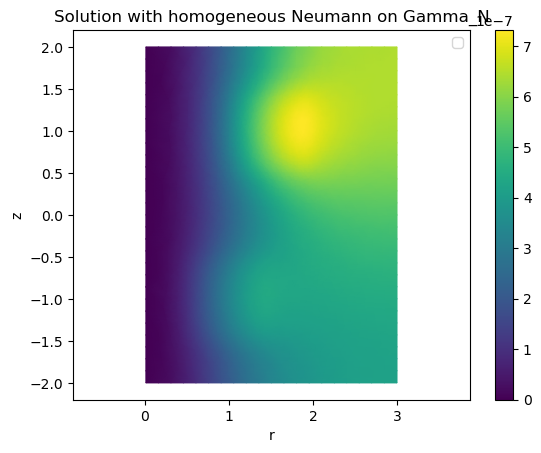

In [11]:
# Compute first a solution with homogeneous neumann:
psi0 = Function(V)
solve(a==L, psi0, bcs = dirichlet)

fig, ax = plt.subplots()
fig.colorbar(tripcolor(psi0, axes=ax))
plt.title(r"Solution with homogeneous Neumann on Gamma_N")
plt.xlabel("r")
plt.ylabel("z")
plt.axis('equal')
plt.legend()
plt.show()

In [18]:
# Compute Neumann datum with BEM using psi0 as flux:
#q = neumann.compute_datum(psi0)
q = neumann.compute_datum(psi)
v = TestFunction(V)
L = j1 * v * dx(2,domain=m) + j2 * v * dx(3,domain=m) - q * v * ds(8,domain=m)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


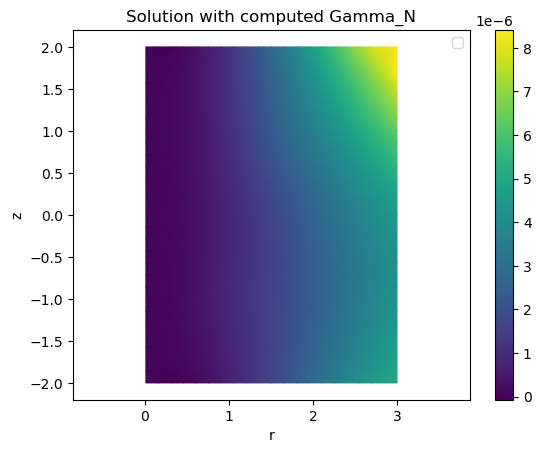

In [19]:
# Compute first a solution with homogeneous neumann:
psi = Function(V)
solve(a==L, psi, bcs = dirichlet)

fig, ax = plt.subplots()
fig.colorbar(tripcolor(psi, axes=ax))
plt.title(r"Solution with computed Gamma_N")
plt.xlabel("r")
plt.ylabel("z")
plt.axis('equal')
plt.legend()
plt.show()

In [14]:
print(f"H1 norm: ", norm(psi,'H1'))
print(f"Maximum psi: ", np.max(psi.dat.data_ro[:]))
print(f"Integral over coils: ", assemble(psi*dx(2)) + assemble(psi*dx(3)))

H1 norm:  3.2491209484207917e-06
Maximum psi:  7.987692011896739e-08
Integral over coils:  -1.4409885262470418e-07


In [15]:
# Values for 60x80 domain:
print(f"H1 norm: ", H1_norm)
print(f"Maximum psi: ", psi_max)
print(f"Integral over coils: ", I)

H1 norm:  2.2840794464593295e-06
Maximum psi:  5.688709695476902e-07
Integral over coils:  6.882978129587993e-07


Look at compatibility condition. As a result, if I iteratively proceed with the solution of the coupled problem I get a q that gets farer and farer from the compatibility condition!

In [ ]:
# Compute integral of q over the Neumann boundary:
q_int = assemble(q*ds(8,domain=m))
print("Boundary integral of the neumann datum: ", q_int)

# Total current inside:
I_tot = assemble(j1*dx(2,domain=m)) + assemble(j2*dx(3,domain=m))
print("Total current inside the domain: ", I_tot)

Boundary integral of the neumann datum:  -2.716081620954522
Total current inside the domain:  2.0


In [17]:
idxs = np.argsort(q.dat.data_ro[:])[:2]
q_fixed = Function(q.function_space()).interpolate(q)
#q_fixed.dat.data[idxs] = -0.223488362855381
q_fixed.dat.data[idxs] = 0.0

q_int = assemble(q_fixed*ds(8,domain=m))
print("Boundary integral of the neumann datum: ", q_int)

Boundary integral of the neumann datum:  2.133646040987555


array([ 0.20300757,  0.19996534, -0.51545822,  0.        ,  0.35123764,
        0.36423531,  0.36077374,  0.34601651,  0.23906327,  0.44132916,
       -0.11501049,  0.64027721,  0.21605923,  0.39566372,  0.26018375,
        0.28684208,  0.22988925,  0.2119062 ,  0.        ,  0.19652992,
       -0.54135435,  0.16971233,  0.17508063,  0.1872446 ,  0.19081683,
        0.17341059,  0.25565577,  0.02108095,  0.15961873,  0.13961081,
        0.1511787 ,  0.23876783,  0.16151598,  0.21685404,  0.21704152])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


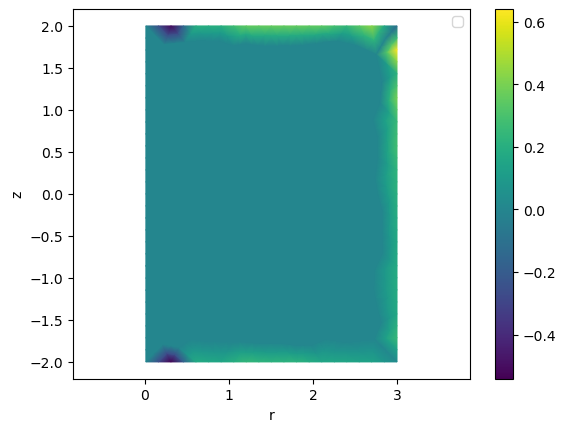

In [24]:
display(q.dat.data_ro[neumann.Q_dofs])
#display(q.dat.data_ro[neumann.Q_dofs[neumann.extremes]])
fig, ax = plt.subplots()
fig.colorbar(tripcolor(q, axes=ax))
plt.xlabel("r")
plt.ylabel("z")
plt.axis('equal')
plt.legend()
plt.show()

array([-5.03976163e-08, -3.95123380e-08, -2.65169493e-08, -4.64313713e-09,
       -5.75689116e-08, -6.20666559e-08, -6.14622402e-08, -6.00570448e-08,
       -4.23713394e-08, -2.39040848e-08, -1.25544844e-07,  1.34916163e-07,
        8.41684481e-08,  6.76457866e-08,  3.61906989e-08,  1.85619904e-08,
       -1.69738597e-09, -1.54590174e-08, -4.69650733e-09, -2.21968197e-08,
       -2.70068499e-08, -2.72478646e-08, -3.96095592e-08, -1.13253550e-08,
       -1.08243223e-09,  1.45561707e-08,  1.02505523e-08, -9.48050215e-08,
       -4.83796053e-08, -8.43167135e-08, -6.71091903e-08, -5.60379858e-08,
       -6.68994040e-08, -5.80526251e-08, -5.84498842e-08])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


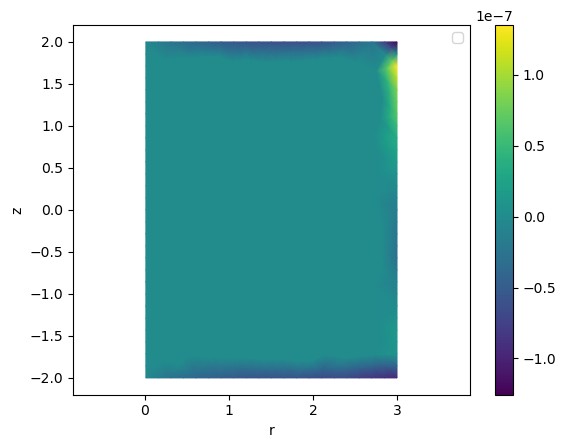

In [12]:
display(neumann.K_func.dat.data_ro[:])
#display(neumann.K_func.dat.data_ro[neumann.extremes])
K = Function(V)
K.dat.data[neumann.Q_dofs] = neumann.K_func.dat.data_ro[:]
fig, ax = plt.subplots()
fig.colorbar(tripcolor(K, axes=ax))
plt.xlabel("r")
plt.ylabel("z")
plt.axis('equal')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


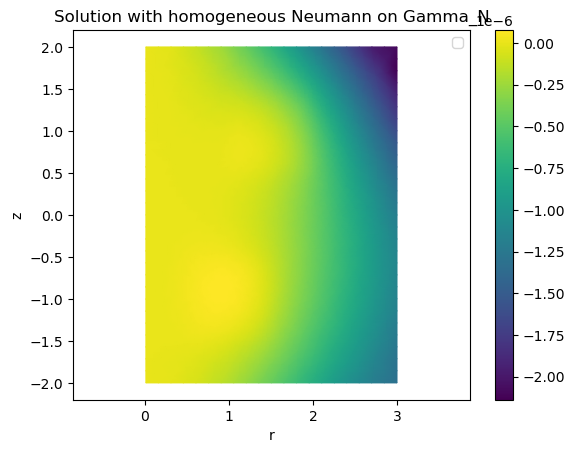

In [95]:
v = TestFunction(V)
L = j1 * v * dx(2,domain=m) + j2 * v * dx(3,domain=m) - q_fixed * v * ds(8,domain=m)

psi = Function(V)
solve(a==L, psi, bcs = dirichlet)

fig, ax = plt.subplots()
fig.colorbar(tripcolor(psi, axes=ax))
plt.title(r"Solution with homogeneous Neumann on Gamma_N")
plt.xlabel("r")
plt.ylabel("z")
plt.axis('equal')
plt.legend()
plt.show()

In [96]:
print(f"H1 norm: ", norm(psi0,'H1'))
print(f"Maximum psi: ", np.max(psi0.dat.data_ro[:]))
print(f"Integral over coils: ", assemble(psi0*dx(2)) + assemble(psi0*dx(3)))

H1 norm:  1.7583906935729108e-06
Maximum psi:  7.31689746622849e-07
Integral over coils:  8.648637208298055e-07


In [97]:
print(f"H1 norm: ", norm(psi,'H1'))
print(f"Maximum psi: ", np.max(psi.dat.data_ro[:]))
print(f"Integral over coils: ", assemble(psi*dx(2)) + assemble(psi*dx(3)))

H1 norm:  3.2596942467337275e-06
Maximum psi:  7.644992406164432e-08
Integral over coils:  -1.5413580546977409e-07


In [88]:
print(f"H1 norm: ", H1_norm)
print(f"Maximum psi: ", psi_max)
print(f"Integral over coils: ", I)

H1 norm:  2.2840794464593295e-06
Maximum psi:  5.688709695476902e-07
Integral over coils:  6.882978129587993e-07
